In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
searched_format = 'csv'
for file in os.listdir(os.getcwd()):
    if searched_format in file:
        PATH = os.path.abspath(file)

In [3]:
games_df = pd.read_csv(PATH)

## Убедимся, что всё считалось правильно: посмотрим на столбцы, типы данных, размерность, наличие пропущенных значений.

In [4]:
games_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
games_df.shape

(16598, 11)

In [6]:
games_df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
games_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
games_df = games_df.dropna()

In [10]:
games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Выведем описательные статистики переменной year и построим распределение количества выпущенных игр по годам:

### Описательная статистика

In [50]:
games_df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

### Распределение игр по годам

In [70]:
# Для проверки графика распределения
games_per_year_df = games_df.groupby('Year', as_index=False) \
                            .agg({'Name': 'count'}) \
                            .rename(columns={'Name': 'Games_amount'})
games_per_year_df.sort_values('Games_amount', ascending=False).head()

,Year,Games_amount
29,2009.0,1431
28,2008.0,1428
30,2010.0,1257
27,2007.0,1201
31,2011.0,1136


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


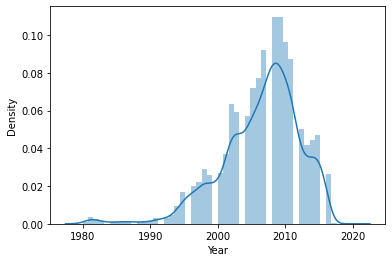

In [60]:
sns.distplot(games_df.Year)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


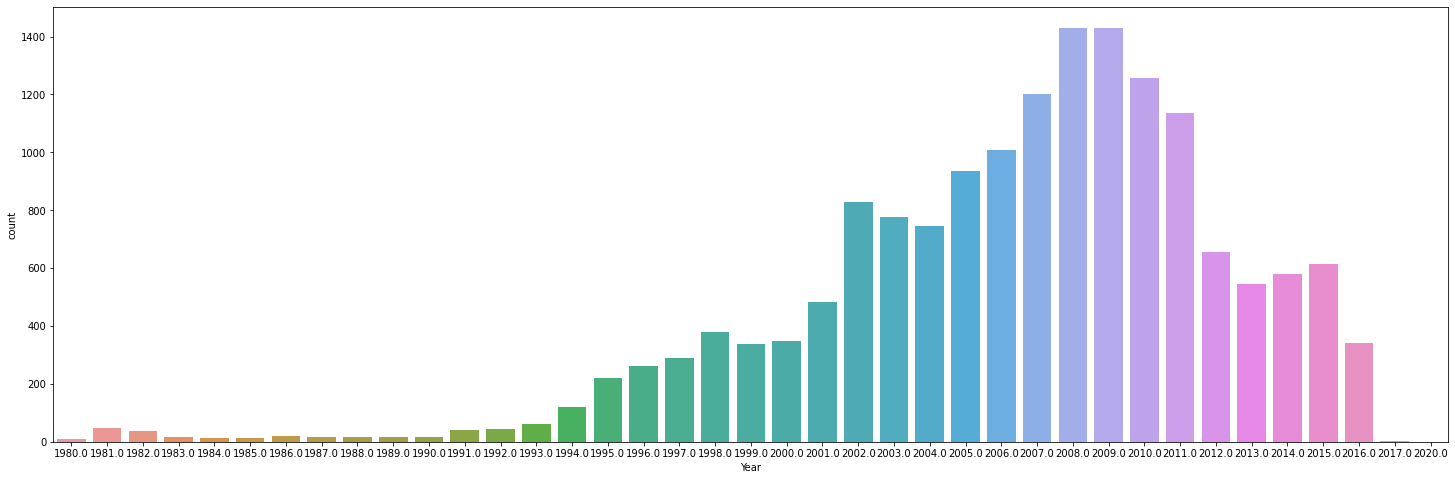

In [63]:
plt.figure(figsize = (25,8))
sns.countplot(games_df.Year)

### Мода

In [74]:
games_mode = stats.mode(games_df.Year)
games_mode

ModeResult(mode=array([2009.]), count=array([1431]))

In [75]:
games_df.Year.mode()

0    2009.0
dtype: float64

## Определим, на каких платформах произошло больше всего релизов?

### Оставим названия платформ, частота встречаемости которых составляет более 7%.  

#### Способ 1

In [84]:
games_per_platform_df = games_df.groupby('Platform', as_index=False) \
                            .agg({'Name': 'count'}) \
                            .rename(columns={'Name': 'Games_Amount'})
games_per_platform_df.head()

,Platform,Games_Amount
0,2600,116
1,3DO,3
2,3DS,499
3,DC,52
4,DS,2131


In [87]:
games_per_platform_df = games_per_platform_df.assign(occurance_freq_percent = 
                                                                     games_per_platform_df.Games_Amount / 
                                                                     games_per_platform_df.Games_Amount.sum() *
                                                                     100
                                                                    )

In [96]:
more_7_percent_platforms = games_per_platform_df.query("occurance_freq_percent > 7") \
                                                .sort_values('occurance_freq_percent', ascending=False) \
                                                .Platform \
                                                .to_list()

In [97]:
more_7_percent_platforms

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

#### Способ 2

In [120]:
platform_rate_df = pd.DataFrame(games_df.Platform \
                                        .value_counts(normalize=True)*100) \
                                        .reset_index() \
                                        .rename(columns={'index': 'platform', 'Platform': 'installing_percentage'})

In [125]:
platform_rate_df.head()

,platform,installing_percentage
0,DS,13.080842
1,PS2,13.056289
2,PS3,8.004420
3,Wii,7.918483
4,X360,7.574735


In [124]:
more_7_percent_platforms_2 = platform_rate_df.query("installing_percentage > 7") \
                                                .sort_values('installing_percentage', ascending=False) \
                                                .platform \
                                                .to_list()
more_7_percent_platforms_2

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

## Определим, игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [127]:
# Определим абсолютную частоту встречаемости через scipy
stats.mode(games_df.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

In [130]:
# Определим абсолютную частоту встречаемости через value_counts
games_df.Publisher.value_counts().max()

1339

## Посчитаем среднее, медиану и стандартное отклонение по продажам игр Nintendo в разных регионах. 

In [14]:
nintendo_df = games_df.query('Publisher == "Nintendo"')
nintendo_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [17]:
nintendo_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


In [28]:
nintendo_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg(['mean', 'median', 'std']).loc['median', :]

NA_Sales       0.375
EU_Sales       0.120
JP_Sales       0.280
Other_Sales    0.030
Name: median, dtype: float64

## Посмотрим на продажи Nintendo в Японии по жанрам.

### Построим боксплот

In [31]:
Japan_nintendo_sales = nintendo_df.groupby('Genre', as_index=False).agg({'JP_Sales': 'sum'})
Japan_nintendo_sales

,Genre,JP_Sales
0,Action,29.16
1,Adventure,9.01
2,Fighting,14.94
3,Misc,55.25
4,Platform,102.36
5,Puzzle,37.09
6,Racing,29.22
7,Role-Playing,101.95
8,Shooter,6.03
9,Simulation,23.65


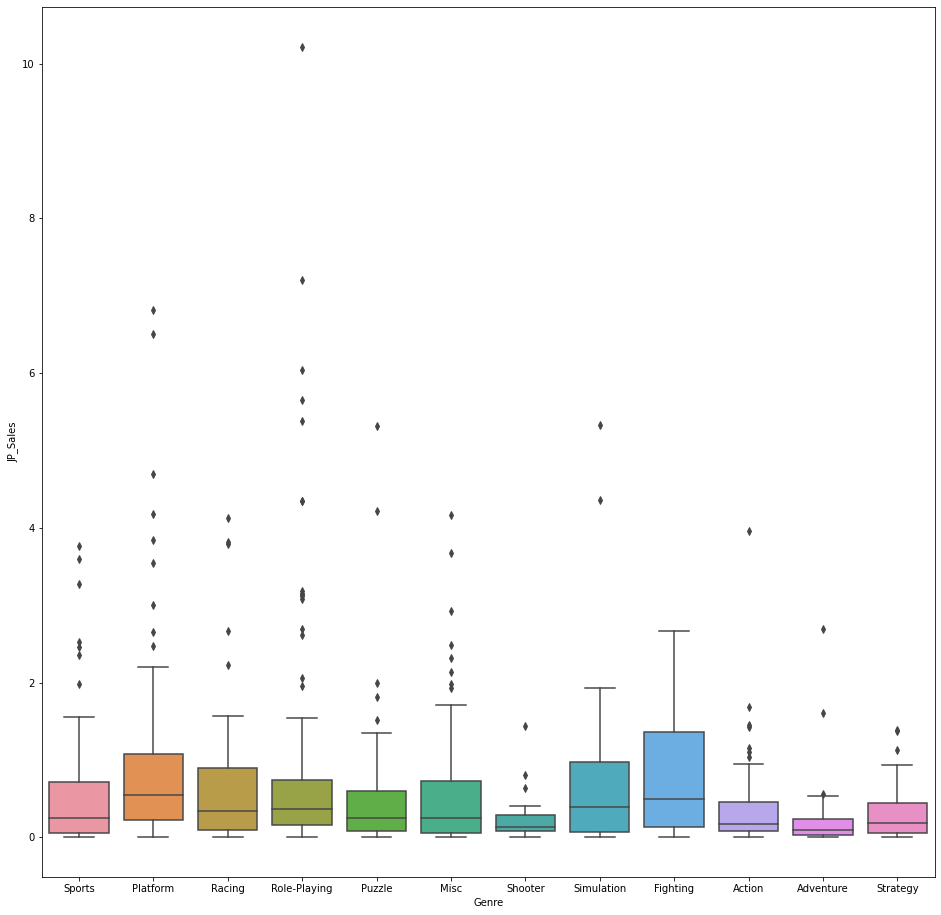

In [35]:
plt.figure(figsize = (16,16))
sns.boxplot(data=nintendo_df, x='Genre', y='JP_Sales')

## Визуализируем динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports

In [43]:
global_nintendo_sales_df = nintendo_df.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')") \
                                        .groupby(['Year', 'Genre'], as_index=False) \
                                        .agg({'Global_Sales': 'sum'})
global_nintendo_sales_df

,Year,Genre,Global_Sales
0,1983.0,Platform,5.62
1,1983.0,Sports,3.20
2,1984.0,Racing,5.68
3,1984.0,Sports,6.18
4,1985.0,Platform,43.17
...,...,...,...
109,2014.0,Sports,0.88
110,2015.0,Platform,5.24
111,2015.0,Simulation,2.98
112,2015.0,Sports,0.45


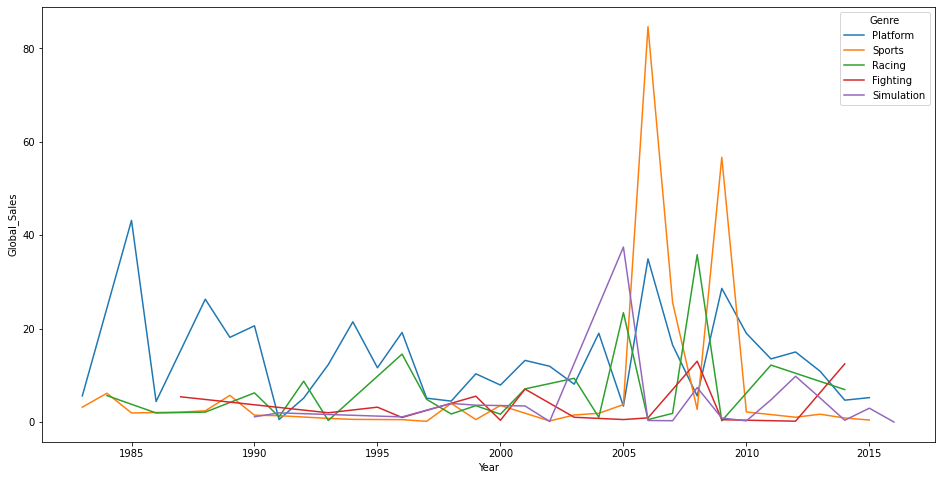

In [44]:
plt.figure(figsize = (16,8))
sns.lineplot(data=global_nintendo_sales_df, x='Year', y='Global_Sales', hue='Genre')